In [30]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [31]:
ticker = 'AVAX-USD'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

In [32]:
log_returns= np.log(1 + data.pct_change())

In [33]:
log_returns.tail()

,AVAX-USD
Date,
2021-02-08,0.223684
2021-02-09,0.042789
2021-02-10,0.559623
2021-02-11,-0.154750
2021-02-12,-0.012560


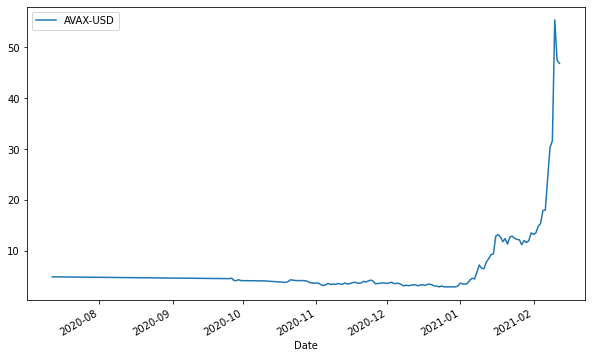

In [34]:
data.plot(figsize=(10,6));

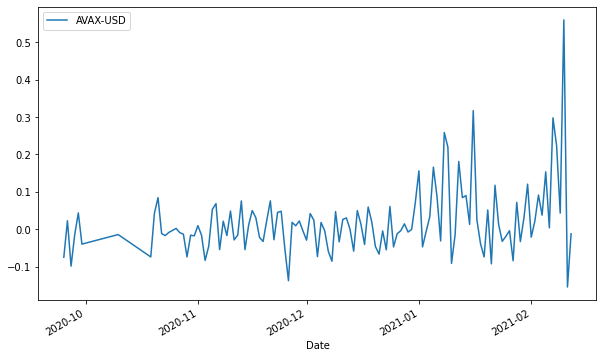

In [35]:
log_returns.plot(figsize=(10,6))
plt.show()

In [36]:
u = log_returns.mean()
u

AVAX-USD    0.018349
dtype: float64

In [37]:
var = log_returns.var()
var

AVAX-USD    0.008523
dtype: float64

In [38]:
drift = u- (0.5 * var)
drift

AVAX-USD    0.014088
dtype: float64

In [39]:
stdev = log_returns.std()
stdev

AVAX-USD    0.092321
dtype: float64

2.nd part

In [40]:
type(drift)

pandas.core.series.Series

In [41]:
type(stdev)

pandas.core.series.Series

In [42]:
np.array(drift)

array([0.01408767])

In [43]:
drift.values

array([0.01408767])

In [44]:
stdev.values

array([0.09232094])

In [45]:
norm.ppf(0.95)

1.6448536269514722

In [46]:
x = np.random.rand(10,2)
x

array([[0.99151426, 0.20992192],
       [0.48103802, 0.9500536 ],
       [0.30569891, 0.54596823],
       [0.37692927, 0.37368087],
       [0.40677762, 0.9099713 ],
       [0.47909677, 0.07281094],
       [0.91070205, 0.50943221],
       [0.5707052 , 0.01984087],
       [0.22509688, 0.51448482],
       [0.16972235, 0.2974174 ]])

In [47]:
norm.ppf(x)

array([[ 2.38732513, -0.80669218],
       [-0.04754854,  1.6453736 ],
       [-0.50807917,  0.11548143],
       [-0.31355567, -0.32212007],
       [-0.23584205,  1.3405783 ],
       [-0.05242063, -1.45517118],
       [ 1.34509082,  0.02364525],
       [ 0.17816983, -2.0570466 ],
       [-0.75509204,  0.03631604],
       [-0.95526303, -0.53184292]])

In [48]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.14843949, -0.42633039],
       [-0.67554399, -0.10156139],
       [-0.97142292,  1.24839968],
       [ 0.05187876, -1.30745593],
       [-1.79584538,  0.16227745],
       [-0.76886366,  0.11021072],
       [ 0.47571443,  0.76492989],
       [ 0.53307754,  0.30920253],
       [-0.17810092,  0.34904162],
       [-0.08775081,  0.17938854]])

In [49]:
t_intervals = 365
iterations = 100

In [50]:
daily_returns = np.exp(drift.values + stdev.values*norm.ppf(np.random.rand(t_intervals, iterations)))

In [51]:
daily_returns

array([[1.2512046 , 0.85244813, 0.9359623 , ..., 0.97872411, 0.89918574,
        0.97585129],
       [1.15487205, 1.16488977, 1.05109426, ..., 1.01623955, 1.10905447,
        1.01471808],
       [1.05112408, 1.02428686, 1.10344467, ..., 1.13642485, 0.97409486,
        1.21590519],
       ...,
       [1.09376951, 0.99425411, 0.90699361, ..., 1.0458466 , 0.93257915,
        0.97038719],
       [0.89281682, 0.86963   , 0.86716496, ..., 1.06557556, 0.90370717,
        1.02844108],
       [1.05025224, 1.00801745, 1.04733743, ..., 0.99454275, 0.99338355,
        0.95365515]])

3rd part


In [52]:
S0 = data.iloc[-1]
S0

AVAX-USD    46.779076
Name: 2021-02-12 00:00:00, dtype: float64

In [53]:
price_list = np.zeros_like(daily_returns)

In [54]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
price_list[0] = S0
price_list

array([[46.77907562, 46.77907562, 46.77907562, ..., 46.77907562,
        46.77907562, 46.77907562],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [56]:
for t in range(1, t_intervals):
  price_list[t] = price_list[t-1] * daily_returns[t]

In [57]:
price_list

array([[4.67790756e+01, 4.67790756e+01, 4.67790756e+01, ...,
        4.67790756e+01, 4.67790756e+01, 4.67790756e+01],
       [5.40238470e+01, 5.44924669e+01, 4.91692180e+01, ...,
        4.75387469e+01, 5.18805428e+01, 4.74675738e+01],
       [5.67857664e+01, 5.58159177e+01, 5.42555116e+01, ...,
        5.40242134e+01, 5.05365701e+01, 5.77160691e+01],
       ...,
       [7.46981002e+04, 1.56750001e+05, 1.06294697e+04, ...,
        1.65484432e+04, 2.16437677e+03, 2.62398369e+04],
       [6.66917203e+04, 1.36314504e+05, 9.21750369e+03, ...,
        1.76336166e+04, 1.95596280e+03, 2.69861261e+04],
       [7.00431289e+04, 1.37407399e+05, 9.65383660e+03, ...,
        1.75373855e+04, 1.94302126e+03, 2.57354580e+04]])

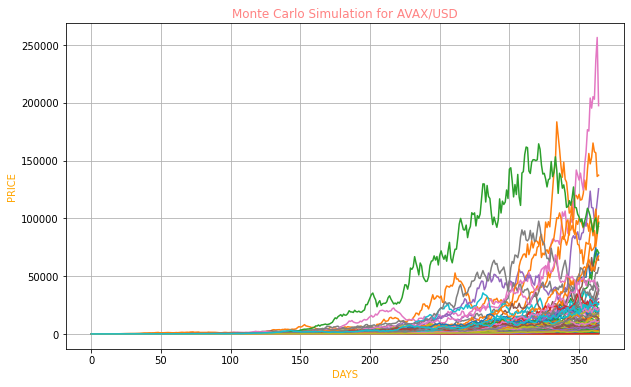

In [58]:
plt.figure(figsize=(10,6))
plt.plot(price_list) 
plt.grid(True)
plt.xlabel('DAYS', color='orange')
plt.ylabel('PRICE', color='orange')
plt.title('Monte Carlo Simulation for AVAX/USD',color='#FF8484')
plt.show()